In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [5]:
# Create a Beautiful Soup Object
html = browser.html
marsSoup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = marsSoup.find_all('tr')

In [8]:
# Create an empty list
marsData = []
# Loop through the scraped data to create a list of rows
for row in rows:
    info = row.find_all('td')
    data = [x.text for x in info]
    marsData.append(data)

In [13]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
marsDf = pd.DataFrame(marsData, columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'])

In [14]:
# Confirm DataFrame was created successfully
marsDf.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,None,None,None,None,None,None,None
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0


In [16]:
marsDf = marsDf.iloc[1:]
marsDf.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


In [12]:
# Examine data type of each column
marsDf.dtypes

id                  object
terrestrial_data    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [15]:
# Change data types for data analysis
marsDf['terrestrial_date'] = pd.to_datetime(marsDf['terrestrial_date'])

In [17]:
marsDf['sol'] = marsDf['sol'].astype(int)
marsDf['ls'] = marsDf['ls'].astype(int)
marsDf['month'] = marsDf['month'].astype(int)
marsDf['min_temp'] = marsDf['min_temp'].astype(float)
marsDf['pressure'] = marsDf['pressure'].astype(float)

In [18]:
marsDf.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [21]:
# 1. How many months are there on Mars?
months = marsDf.month.unique()
print(f'There are {len(months)} months on Mars')

There are 12 months on Mars


In [22]:
# 2. How many Martian days' worth of data are there?
days = marsDf.sol.unique()
print(f'There are {len(days)} days worth of data')

There are 1867 days worth of data


In [23]:
# 3. What is the average low temperature by month?
avgLow = marsDf.groupby('month').mean()['min_temp']
avgLow

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [25]:
avgLow.head()

month
1   -77.160920
2   -79.932584
3   -83.307292
4   -82.747423
5   -79.308725
Name: min_temp, dtype: float64

In [30]:
avgLowDf = avgLow.to_frame()
avgLowDf.reset_index(inplace=True)
avgLowDf.head()

,month,min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725


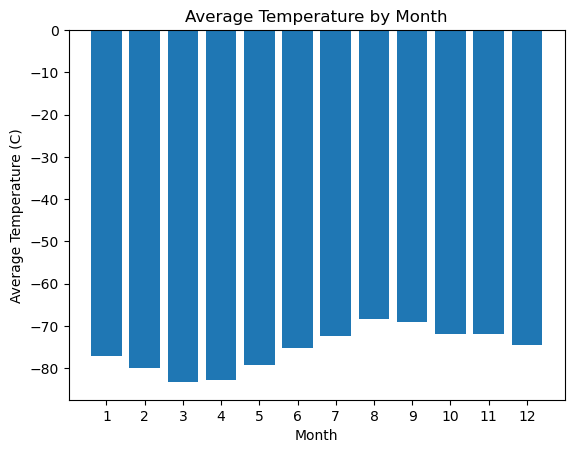

In [61]:
# Plot the average temperature by month
xAxis = avgLowDf['month']
temps = avgLowDf['min_temp']
plt.bar(xAxis, temps)
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.title('Average Temperature by Month')
plt.xticks(xAxis)
plt.show()

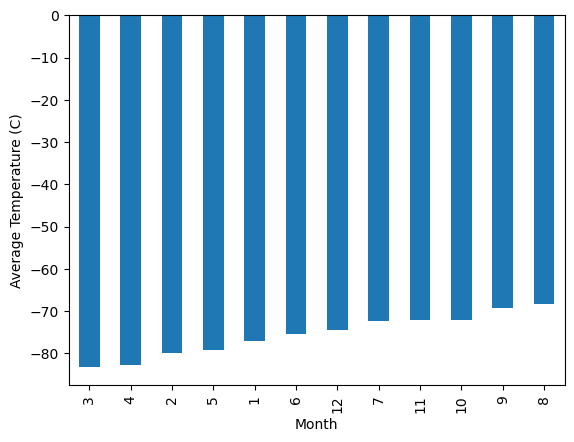

In [63]:
# Identify the coldest and hottest months in Curiosity's location
avgLow.sort_values().plot.bar(x = 'month', y = 'min_temp')
plt.xlabel('Month')
plt.ylabel('Average Temperature (C)')
plt.show()

In [51]:
# 4. Average pressure by Martian month
avgPressure = marsDf.groupby('month').mean()['pressure']
avgPressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [53]:
avgPressDf = avgPressure.to_frame()
avgPressDf.reset_index(inplace=True)
avgPressDf.head()

,month,pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047


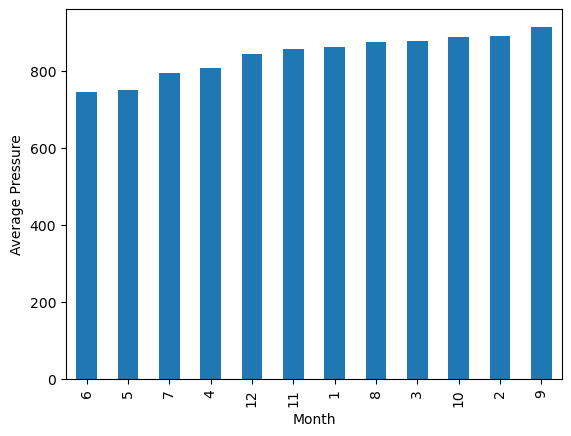

In [64]:
# Plot the average pressure by month
avgPressure.sort_values().plot.bar(x = 'month', y = 'pressure')
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

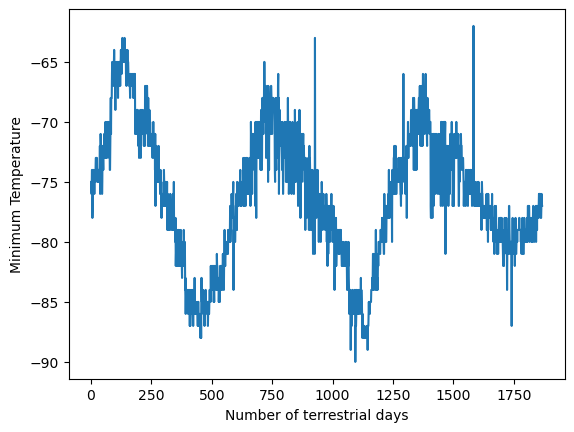

In [59]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(marsDf['min_temp'])
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.


In [65]:
# Write the data to a CSV
marsDf.to_csv('MarsData.csv')

In [66]:
browser.quit()